In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Configuration pour les graphiques
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Bibliothèques importées avec succès!")


Bibliothèques importées avec succès!


In [2]:
# Chargement des données depuis le fichier CSV
csv_file = 'resultat.csv'

if os.path.exists(csv_file):
    df = pd.read_csv(csv_file, encoding='utf-8')
    print(f"✅ Données chargées avec succès!")
    print(f"📊 Nombre de produits: {len(df)}")
    print(f"📋 Colonnes disponibles: {list(df.columns)}")
    print(f"\n🔍 Aperçu des données:")
    display(df.head())
else:
    print(f"❌ Erreur: Le fichier '{csv_file}' n'existe pas.")
    print("Veuillez d'abord exécuter le notebook de scraping (main.ipynb) pour générer les données.")
    df = pd.DataFrame()  # DataFrame vide pour éviter les erreurs


✅ Données chargées avec succès!
📊 Nombre de produits: 24
📋 Colonnes disponibles: ['titre', 'prix_solde', 'prix_avant_reduction', 'note', 'lien_image']

🔍 Aperçu des données:


,titre,prix_solde,prix_avant_reduction,note,lien_image
0,12 Roses Orange à Longue Tige,44.99,69.99,4.0,https://live.data.necs.ca/storage/products/12_...
1,Délice Rose & Rouge,69.99,109.99,4.0,https://live.data.necs.ca/storage/products/dli...
2,Bouquet Chérie,44.99,74.99,4.0,https://live.data.necs.ca/storage/products/bou...
3,Marguerites Ensoleillées,29.99,49.99,4.0,https://live.data.necs.ca/storage/products/sun...
4,Meilleur Vendeur,90.99,90.99,4.0,https://live.data.necs.ca/storage/products/mei...


In [3]:
# Préparation des données pour l'analyse
if not df.empty:
    # Conversion des prix avant réduction en float
    df['prix_avant_reduction'] = pd.to_numeric(df['prix_avant_reduction'], errors='coerce')
    
    # Calcul du pourcentage de réduction
    df['pourcentage_reduction'] = ((df['prix_avant_reduction'] - df['prix_solde']) / df['prix_avant_reduction'] * 100).round(1)
    
    # Calcul de l'économie en dollars
    df['economie_dollars'] = (df['prix_avant_reduction'] - df['prix_solde']).round(2)
    
    # Remplacer les valeurs NaN par 0 pour les cas où il n'y a pas de réduction
    df['pourcentage_reduction'] = df['pourcentage_reduction'].fillna(0)
    df['economie_dollars'] = df['economie_dollars'].fillna(0)
    
    print("✅ Données préparées pour l'analyse:")
    print(f"📦 {len(df)} produits analysés")
    print(f"💰 Prix moyen (soldé): {df['prix_solde'].mean():.2f}$")
    print(f"⭐ Note moyenne: {df['note'].mean():.1f}/5")
    print(f"🎯 Réduction moyenne: {df['pourcentage_reduction'].mean():.1f}%")
    print(f"💸 Économie moyenne: {df['economie_dollars'].mean():.2f}$")
else:
    print("❌ Aucune donnée disponible pour l'analyse")


✅ Données préparées pour l'analyse:
📦 24 produits analysés
💰 Prix moyen (soldé): 48.49$
⭐ Note moyenne: 4.5/5
🎯 Réduction moyenne: 28.4%
💸 Économie moyenne: 20.62$


/var/folders/l5/t80xmm056czg635jfch0cqrh0000gn/T/ipykernel_72050/2892350189.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(prix_data, labels=['Prix Soldé', 'Prix Original'])


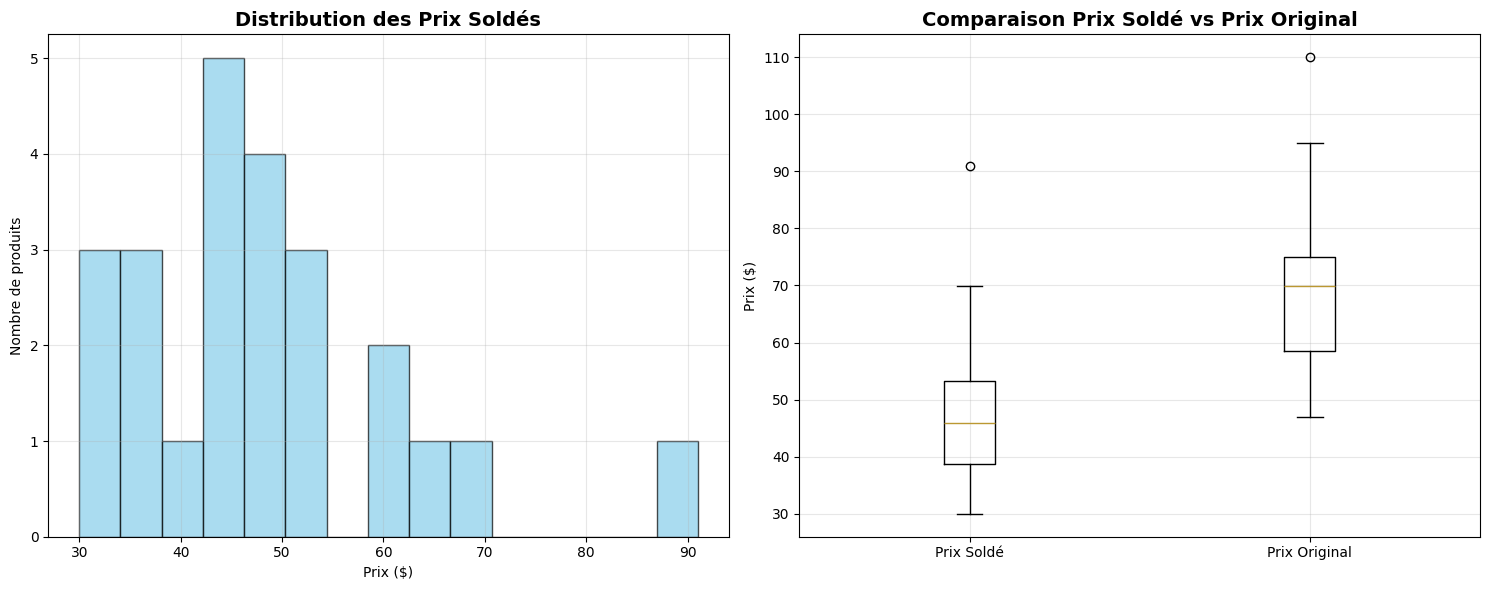


📈 Statistiques des prix:
       prix_solde  prix_avant_reduction
count       24.00                 24.00
mean        48.49                 69.11
std         14.16                 15.62
min         29.99                 46.99
25%         38.74                 58.49
50%         45.99                 69.99
75%         53.24                 74.99
max         90.99                109.99


In [4]:
# Graphique 1: Distribution des prix
if not df.empty:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Histogramme des prix soldés
    ax1.hist(df['prix_solde'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
    ax1.set_title('Distribution des Prix Soldés', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Prix ($)')
    ax1.set_ylabel('Nombre de produits')
    ax1.grid(True, alpha=0.3)
    
    # Box plot comparant prix soldé vs prix original
    prix_data = [df['prix_solde'], df['prix_avant_reduction'].dropna()]
    ax2.boxplot(prix_data, labels=['Prix Soldé', 'Prix Original'])
    ax2.set_title('Comparaison Prix Soldé vs Prix Original', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Prix ($)')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Statistiques descriptives
    print("\n📈 Statistiques des prix:")
    print(df[['prix_solde', 'prix_avant_reduction']].describe().round(2))
else:
    print("❌ Aucune donnée disponible pour l'analyse des prix")


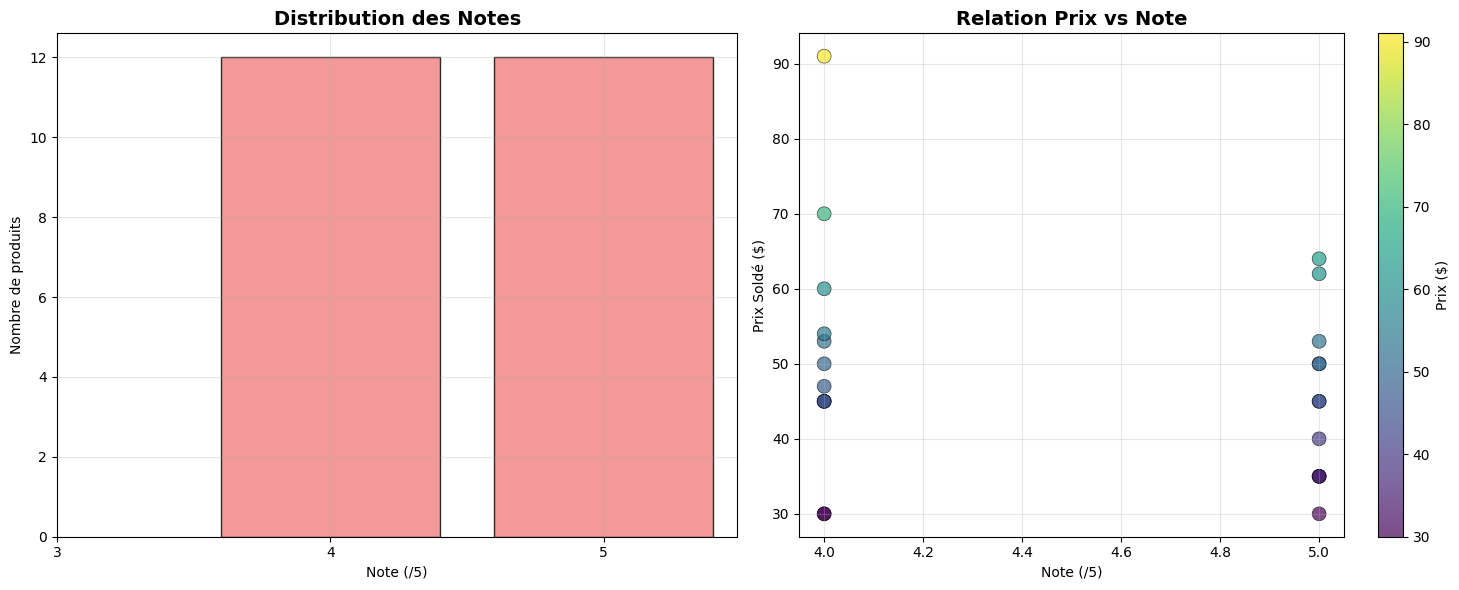


⭐ Analyse par note:
Note 4.0/5: 12 produits, prix moyen: 51.66$
Note 5.0/5: 12 produits, prix moyen: 45.32$


In [5]:
# Graphique 2: Analyse des notes
if not df.empty:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Distribution des notes
    note_counts = df['note'].value_counts().sort_index()
    ax1.bar(note_counts.index, note_counts.values, color='lightcoral', alpha=0.8, edgecolor='black')
    ax1.set_title('Distribution des Notes', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Note (/5)')
    ax1.set_ylabel('Nombre de produits')
    ax1.set_xticks([3, 4, 5])
    ax1.grid(True, alpha=0.3)
    
    # Relation Prix vs Note
    scatter = ax2.scatter(df['note'], df['prix_solde'], alpha=0.7, s=100, c=df['prix_solde'], 
                         cmap='viridis', edgecolor='black', linewidth=0.5)
    ax2.set_title('Relation Prix vs Note', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Note (/5)')
    ax2.set_ylabel('Prix Soldé ($)')
    ax2.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax2, label='Prix ($)')
    
    plt.tight_layout()
    plt.show()
    
    # Analyse par note
    print("\n⭐ Analyse par note:")
    for note in sorted(df['note'].unique()):
        produits_note = df[df['note'] == note]
        print(f"Note {note}/5: {len(produits_note)} produits, prix moyen: {produits_note['prix_solde'].mean():.2f}$")
else:
    print("❌ Aucune donnée disponible pour l'analyse des notes")


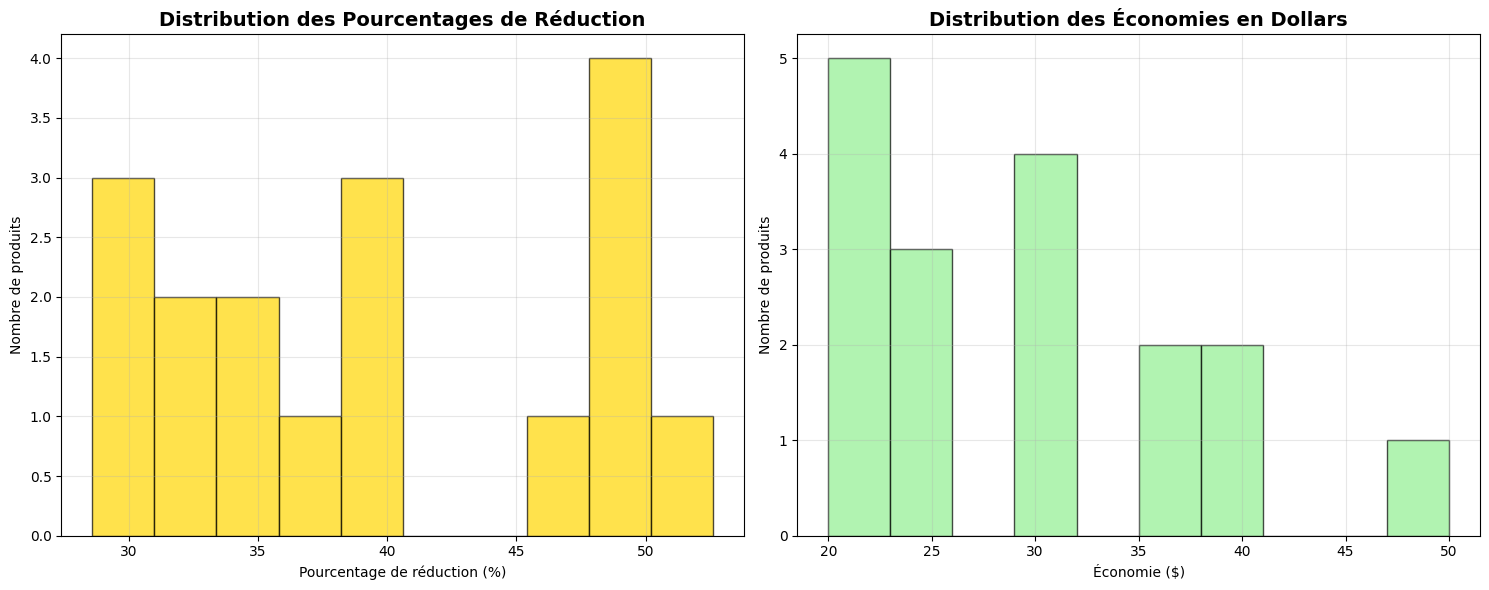


💸 Analyse des réductions:
🎯 17 produits en réduction sur 24 total
📊 Réduction moyenne: 40.1%
💰 Économie moyenne: 29.12$
🔥 Plus grosse réduction: 52.6%
💎 Plus grosse économie: 50.00$


In [6]:
# Graphique 3: Analyse des réductions
if not df.empty:
    # Filtrer les produits avec réduction (pourcentage > 0)
    df_reduc = df[df['pourcentage_reduction'] > 0]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Distribution des pourcentages de réduction
    if not df_reduc.empty:
        ax1.hist(df_reduc['pourcentage_reduction'], bins=10, alpha=0.7, color='gold', edgecolor='black')
        ax1.set_title('Distribution des Pourcentages de Réduction', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Pourcentage de réduction (%)')
        ax1.set_ylabel('Nombre de produits')
        ax1.grid(True, alpha=0.3)
        
        # Économies en dollars
        ax2.hist(df_reduc['economie_dollars'], bins=10, alpha=0.7, color='lightgreen', edgecolor='black')
        ax2.set_title('Distribution des Économies en Dollars', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Économie ($)')
        ax2.set_ylabel('Nombre de produits')
        ax2.grid(True, alpha=0.3)
    else:
        ax1.text(0.5, 0.5, 'Aucune réduction trouvée', ha='center', va='center', transform=ax1.transAxes)
        ax2.text(0.5, 0.5, 'Aucune réduction trouvée', ha='center', va='center', transform=ax2.transAxes)
    
    plt.tight_layout()
    plt.show()
    
    # Statistiques des réductions
    if not df_reduc.empty:
        print(f"\n💸 Analyse des réductions:")
        print(f"🎯 {len(df_reduc)} produits en réduction sur {len(df)} total")
        print(f"📊 Réduction moyenne: {df_reduc['pourcentage_reduction'].mean():.1f}%")
        print(f"💰 Économie moyenne: {df_reduc['economie_dollars'].mean():.2f}$")
        print(f"🔥 Plus grosse réduction: {df_reduc['pourcentage_reduction'].max():.1f}%")
        print(f"💎 Plus grosse économie: {df_reduc['economie_dollars'].max():.2f}$")
    else:
        print("\n❌ Aucun produit en réduction trouvé")
else:
    print("❌ Aucune donnée disponible pour l'analyse des réductions")


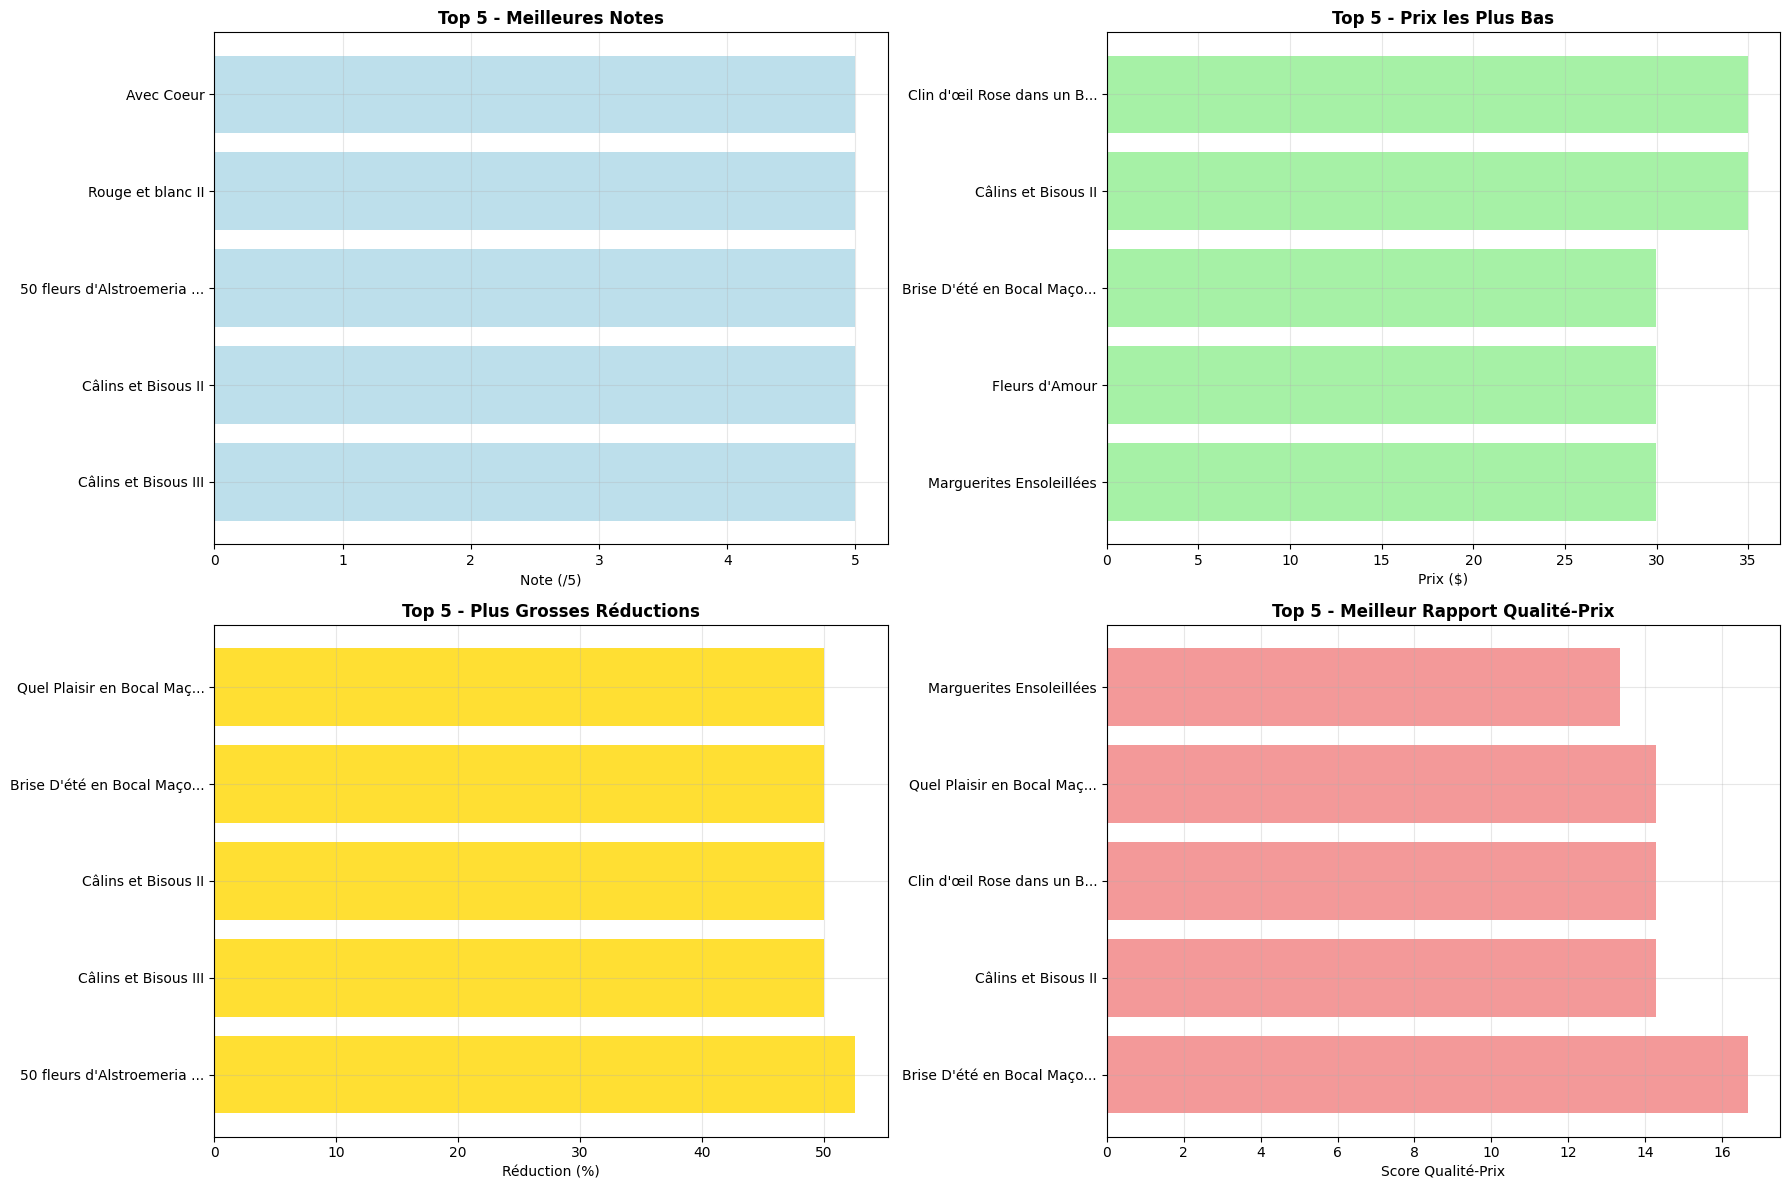

In [7]:
# Graphique 4: Top produits par différents critères
if not df.empty:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))
    
    # Top 5 produits les mieux notés
    top_notes = df.nlargest(5, 'note')[['titre', 'note', 'prix_solde']]
    y_pos = np.arange(len(top_notes))
    ax1.barh(y_pos, top_notes['note'], color='lightblue', alpha=0.8)
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels([titre[:25] + '...' if len(titre) > 25 else titre for titre in top_notes['titre']])
    ax1.set_xlabel('Note (/5)')
    ax1.set_title('Top 5 - Meilleures Notes', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # Top 5 produits les moins chers
    top_pas_cher = df.nsmallest(5, 'prix_solde')[['titre', 'prix_solde', 'note']]
    y_pos = np.arange(len(top_pas_cher))
    ax2.barh(y_pos, top_pas_cher['prix_solde'], color='lightgreen', alpha=0.8)
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels([titre[:25] + '...' if len(titre) > 25 else titre for titre in top_pas_cher['titre']])
    ax2.set_xlabel('Prix ($)')
    ax2.set_title('Top 5 - Prix les Plus Bas', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # Top 5 plus grosses réductions (si disponibles)
    if not df[df['pourcentage_reduction'] > 0].empty:
        top_reduc = df[df['pourcentage_reduction'] > 0].nlargest(5, 'pourcentage_reduction')[['titre', 'pourcentage_reduction', 'economie_dollars']]
        y_pos = np.arange(len(top_reduc))
        ax3.barh(y_pos, top_reduc['pourcentage_reduction'], color='gold', alpha=0.8)
        ax3.set_yticks(y_pos)
        ax3.set_yticklabels([titre[:25] + '...' if len(titre) > 25 else titre for titre in top_reduc['titre']])
        ax3.set_xlabel('Réduction (%)')
        ax3.set_title('Top 5 - Plus Grosses Réductions', fontsize=12, fontweight='bold')
        ax3.grid(True, alpha=0.3)
    else:
        ax3.text(0.5, 0.5, 'Aucune réduction disponible', ha='center', va='center', transform=ax3.transAxes)
        ax3.set_title('Top 5 - Plus Grosses Réductions', fontsize=12, fontweight='bold')
    
    # Meilleur rapport qualité-prix (note élevée + prix bas)
    df['score_qualite_prix'] = df['note'] / (df['prix_solde'] / 100)  # Score relatif
    top_qualite_prix = df.nlargest(5, 'score_qualite_prix')[['titre', 'note', 'prix_solde', 'score_qualite_prix']]
    y_pos = np.arange(len(top_qualite_prix))
    ax4.barh(y_pos, top_qualite_prix['score_qualite_prix'], color='lightcoral', alpha=0.8)
    ax4.set_yticks(y_pos)
    ax4.set_yticklabels([titre[:25] + '...' if len(titre) > 25 else titre for titre in top_qualite_prix['titre']])
    ax4.set_xlabel('Score Qualité-Prix')
    ax4.set_title('Top 5 - Meilleur Rapport Qualité-Prix', fontsize=12, fontweight='bold')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("❌ Aucune donnée disponible pour l'analyse des top produits")


/Users/raharison/docs/TP/exam-intra-H2025/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/raharison/docs/TP/exam-intra-H2025/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/raharison/docs/TP/exam-intra-H2025/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/raharison/docs/TP/exam-intra-H2025/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/raharison/docs/TP/exam-intra-H2025/.venv/lib/python3.13/site-packages/IP

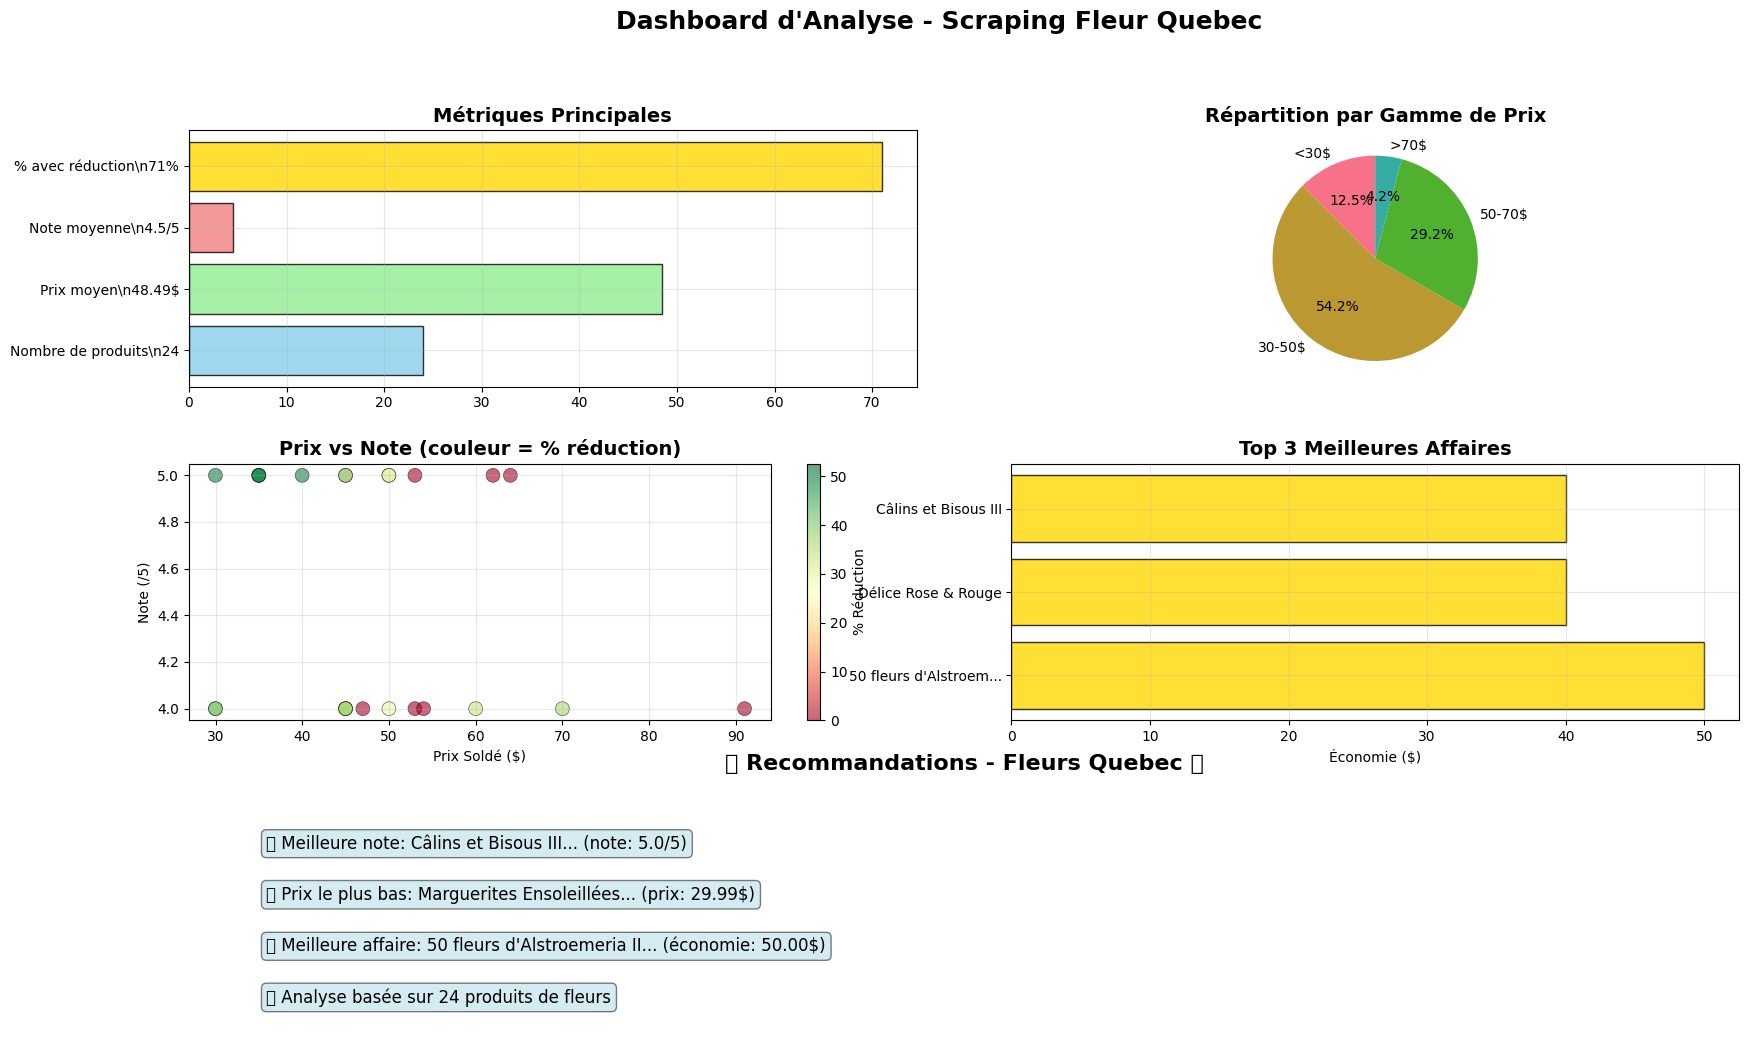

In [8]:
# Graphique 5: Dashboard de synthèse
if not df.empty:
    fig = plt.figure(figsize=(20, 12))
    
    # Création d'une grille pour les graphiques
    gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)
    
    # 1. Métriques principales
    ax1 = fig.add_subplot(gs[0, :2])
    metrics = [
        ['Nombre de produits', len(df)],
        ['Prix moyen', f"{df['prix_solde'].mean():.2f}$"],
        ['Note moyenne', f"{df['note'].mean():.1f}/5"],
        ['% avec réduction', f"{(len(df[df['pourcentage_reduction'] > 0]) / len(df) * 100):.0f}%"]
    ]
    
    y_positions = range(len(metrics))
    values = [float(str(m[1]).replace('$', '').replace('/5', '').replace('%', '')) for m in metrics]
    colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']
    
    bars = ax1.barh(y_positions, values, color=colors, alpha=0.8, edgecolor='black')
    ax1.set_yticks(y_positions)
    ax1.set_yticklabels([f"{m[0]}\\n{m[1]}" for m in metrics])
    ax1.set_title('Métriques Principales', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # 2. Distribution des prix par gamme
    ax2 = fig.add_subplot(gs[0, 2:])
    # Créer les catégories de prix manuellement pour éviter les problèmes de types
    prix_categories = ['<30$', '30-50$', '50-70$', '>70$']
    prix_counts = [
        len(df[df['prix_solde'] < 30]),
        len(df[(df['prix_solde'] >= 30) & (df['prix_solde'] < 50)]),
        len(df[(df['prix_solde'] >= 50) & (df['prix_solde'] < 70)]),
        len(df[df['prix_solde'] >= 70])
    ]
    ax2.pie(prix_counts, labels=prix_categories, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Répartition par Gamme de Prix', fontsize=14, fontweight='bold')
    
    # 3. Corrélation prix vs note
    ax3 = fig.add_subplot(gs[1, :2])
    scatter = ax3.scatter(df['prix_solde'], df['note'], s=100, alpha=0.6, c=df['pourcentage_reduction'], 
                         cmap='RdYlGn', edgecolor='black', linewidth=0.5)
    ax3.set_xlabel('Prix Soldé ($)')
    ax3.set_ylabel('Note (/5)')
    ax3.set_title('Prix vs Note (couleur = % réduction)', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax3, label='% Réduction')
    
    # 4. Top 3 meilleures affaires
    ax4 = fig.add_subplot(gs[1, 2:])
    df_avec_reduc = df[df['pourcentage_reduction'] > 0]
    if not df_avec_reduc.empty:
        top_deals = df_avec_reduc.nlargest(3, 'economie_dollars')[['titre', 'economie_dollars']]
        y_pos = np.arange(len(top_deals))
        ax4.barh(y_pos, top_deals['economie_dollars'], color='gold', alpha=0.8, edgecolor='black')
        ax4.set_yticks(y_pos)
        ax4.set_yticklabels([titre[:20] + '...' if len(titre) > 20 else titre for titre in top_deals['titre']])
        ax4.set_xlabel('Économie ($)')
        ax4.set_title('Top 3 Meilleures Affaires', fontsize=14, fontweight='bold')
        ax4.grid(True, alpha=0.3)
    else:
        ax4.text(0.5, 0.5, 'Aucune réduction\\ndisponible', ha='center', va='center', 
                transform=ax4.transAxes, fontsize=12)
        ax4.set_title('Top 3 Meilleures Affaires', fontsize=14, fontweight='bold')
    
    # 5. Recommandations
    ax5 = fig.add_subplot(gs[2, :])
    ax5.axis('off')
    
    # Calcul des recommandations de manière plus robuste
    idx_meilleure_note = df['note'].idxmax()
    meilleure_note = df.loc[idx_meilleure_note]
    idx_moins_cher = df['prix_solde'].idxmin()
    moins_cher = df.loc[idx_moins_cher]
    
    if not df_avec_reduc.empty:
        idx_meilleure_affaire = df_avec_reduc['economie_dollars'].idxmax()
        meilleure_affaire = df_avec_reduc.loc[idx_meilleure_affaire]
        affaire_text = f"🎯 Meilleure affaire: {meilleure_affaire['titre'][:30]}... (économie: {meilleure_affaire['economie_dollars']:.2f}$)"
    else:
        affaire_text = "🎯 Aucune réduction trouvée"
    
    recommandations = [
        f"⭐ Meilleure note: {meilleure_note['titre'][:30]}... (note: {meilleure_note['note']}/5)",
        f"💰 Prix le plus bas: {moins_cher['titre'][:30]}... (prix: {moins_cher['prix_solde']:.2f}$)",
        affaire_text,
        f"📊 Analyse basée sur {len(df)} produits de fleurs"
    ]
    
    for i, rec in enumerate(recommandations):
        ax5.text(0.05, 0.8 - i*0.2, rec, fontsize=12, transform=ax5.transAxes, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.5))
    
    ax5.set_title('🌸 Recommandations - Fleurs Quebec 🌸', fontsize=16, fontweight='bold', pad=20)
    
    plt.suptitle("Dashboard d'Analyse - Scraping Fleur Quebec", fontsize=18, fontweight='bold', y=0.98)
    plt.show()
else:
    print("❌ Aucune donnée disponible pour le dashboard")
